In [17]:
from sqlalchemy import create_engine, inspect

# Create an engine to connect to the database
engine = create_engine('sqlite:////blue/bsc4452/Marisa1988/project-2-deitzmorales/world.sqlite')

# Use the inspect module to get table names
inspector = inspect(engine)
tables = inspector.get_table_names()

print(tables)

['city', 'country', 'countrylanguage', 'sqlite_sequence']


In [ ]:
from sqlalchemy import create_engine, Column, String, Float, Integer
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

# Define the base class for declarative models
Base = declarative_base()

# Define the CountryLanguage table model
class CountryLanguage(Base):
    __tablename__ = 'CountryLanguage'
    CountryCode = Column(String, primary_key=True)
    Language = Column(String, primary_key=True)
    IsOfficial = Column(String)
    Percentage = Column(Float)

# Create an engine to connect to the database
engine = create_engine('sqlite:////blue/bsc4452/Marisa1988/project-2-deitzmorales/world.sqlite')

# Create a session factory
Session = sessionmaker(bind=engine)
session = Session()

# Query the CountryLanguage table
languages = session.query(CountryLanguage).all()

# Print the information
for language in languages:
    print(f"CountryCode: {language.CountryCode}, Language: {language.Language}, IsOfficial: {language.IsOfficial}, Percentage: {language.Percentage}")

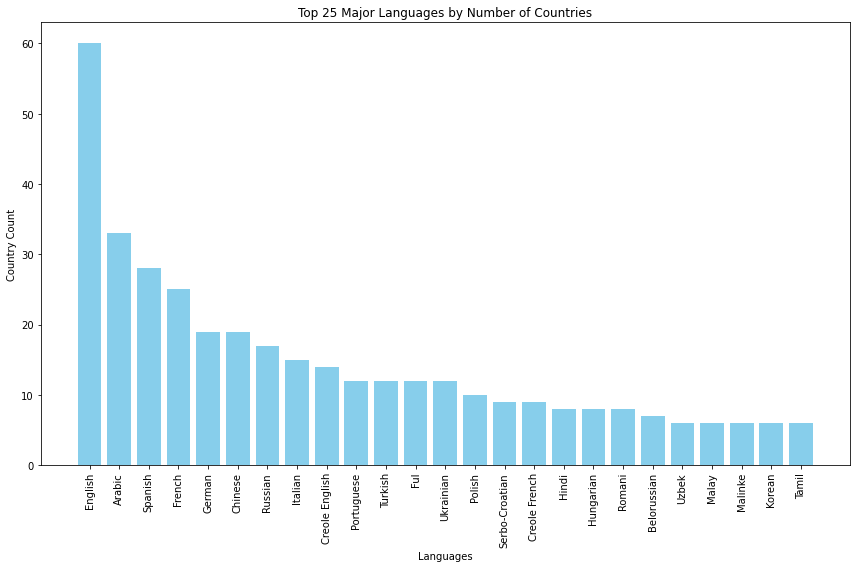

In [5]:
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, Column, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from collections import Counter

# Define the base class for declarative models
Base = declarative_base()

# Define the CountryLanguage table model
class CountryLanguage(Base):
    __tablename__ = 'CountryLanguage'
    CountryCode = Column(String, primary_key=True)
    Language = Column(String, primary_key=True)
    IsOfficial = Column(String)
    Percentage = Column(Float)

# Create an engine to connect to the database
engine = create_engine('sqlite:////blue/bsc4452/Marisa1988/project-2-deitzmorales/world.sqlite')

# Create a session factory
Session = sessionmaker(bind=engine)
session = Session()

# Query the CountryLanguage table
languages = session.query(CountryLanguage).all()

# Count the number of countries for each language
language_counter = Counter([language.Language for language in languages])

# Get the top 25 major languages by country count
top_25_languages = language_counter.most_common(25)

# Prepare data for plotting
languages = [language for language, count in top_25_languages]
country_counts = [count for language, count in top_25_languages]

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(languages, country_counts, color='skyblue')
plt.xlabel('Languages')
plt.ylabel('Country Count')
plt.title('Top 25 Major Languages by Number of Countries')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
from sqlalchemy import create_engine, Column, String, Integer, Table, MetaData, select
from sqlalchemy.orm import sessionmaker

# Define your database connection
engine = create_engine('sqlite:////blue/bsc4452/Marisa1988/project-2-deitzmorales/world.sqlite')
Session = sessionmaker(bind=engine)
session = Session()
metadata = MetaData()

# Define the existing tables
country_language = Table('CountryLanguage', metadata,
                         Column('Language', String),
                         Column('CountryCode', String))  # Ensure CountryCode is defined

city = Table('City', metadata,
             Column('Name', String),
             Column('CountryCode', String))

# Define the new table with an auto-incrementing ID, using extend_existing=True
city_language = Table('CityLanguage', metadata,
                      Column('ID', Integer, primary_key=True, autoincrement=True),
                      Column('Language', String),
                      Column('Name', String),  # Ensure Name is defined
                      Column('CountryCode', String),
                      extend_existing=True)

# Create the new table in the database
metadata.create_all(engine)

# Perform the join and insert into the new table
stmt = select([country_language.c.Language, city.c.Name, city.c.CountryCode]).\
    select_from(country_language.join(city, country_language.c.CountryCode == city.c.CountryCode))

results = session.execute(stmt).fetchall()

# Insert the results into the new table
for row in results:
    insert_stmt = city_language.insert().values(Language=row.Language, Name=row.Name, CountryCode=row.CountryCode)
    session.execute(insert_stmt)

# Commit the transaction
session.commit()

# Close the session
session.close()